In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## From Biological to Artificial Neurons

#### The Perceptron

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [3]:
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int32) # Iris setosa?

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

## Implementing MLPs with Keras

#### Building an Image Classifier Using the Sequential API

##### Using Keras to load the dataset

In [4]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

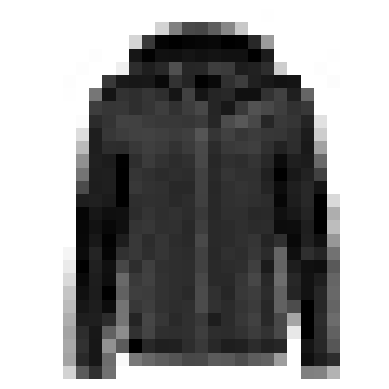

'Coat'

In [10]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_train[0]]

##### Creating the model using the Sequential API

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer("dense") is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights.shape

(784, 300)

In [19]:
biases.shape

(300,)

##### Compiling the model

In [20]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

##### Training and evaluating the model

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 2s 1ms/step - loss: 0.7223 - accuracy: 0.7614 - val_loss: 0.5172 - val_accuracy: 0.8246
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4873 - accuracy: 0.8301 - val_loss: 0.4349 - val_accuracy: 0.8556
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4415 - accuracy: 0.8443 - val_loss: 0.5567 - val_accuracy: 0.7916
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4148 - accuracy: 0.8551 - val_loss: 0.3941 - val_accuracy: 0.8666
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3967 - accuracy: 0.8619 - val_loss: 0.3796 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3780 - accuracy: 0.8667 - val_loss: 0.3732 - val_accuracy: 0.8704
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3659 - accuracy: 0.8712 - val_loss: 0.3656 - val_accurac

In [22]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [23]:
len(history.epoch)

30

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

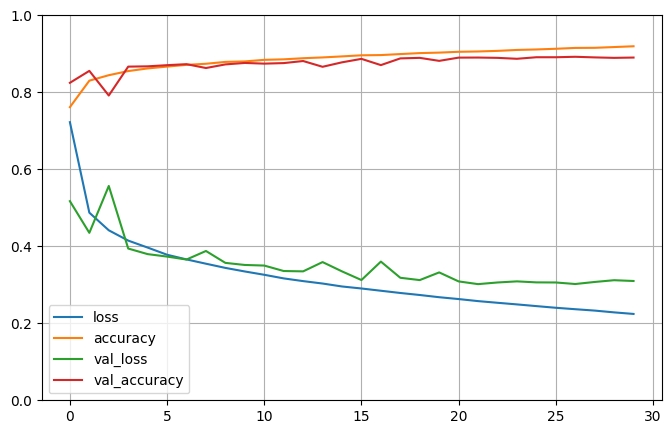

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 777us/step - loss: 0.3376 - accuracy: 0.8812


[0.3376227915287018, 0.8812000155448914]

##### Using the model to make predictions

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new, verbose=0)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
y_pred = np.argmax(model.predict(X_new, verbose=0), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### Building a Regression MLP Using the Sequential API

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 987us/step - loss: 1.8270 - val_loss: 0.8787
Epoch 2/20
363/363 [==============================] - 0s 731us/step - loss: 0.8011 - val_loss: 0.7670
Epoch 3/20
363/363 [==============================] - 0s 767us/step - loss: 0.6989 - val_loss: 0.6572
Epoch 4/20
363/363 [==============================] - 0s 774us/step - loss: 0.6516 - val_loss: 0.6022
Epoch 5/20
363/363 [==============================] - 0s 804us/step - loss: 0.6180 - val_loss: 0.5662
Epoch 6/20
363/363 [==============================] - 0s 736us/step - loss: 0.5903 - val_loss: 0.5436
Epoch 7/20
363/363 [==============================] - 0s 783us/step - loss: 0.5678 - val_loss: 0.5266
Epoch 8/20
363/363 [==============================] - 0s 851us/step - loss: 0.5486 - val_loss: 0.5061
Epoch 9/20
363/363 [==============================] - 0s 816us/step - loss: 0.5321 - val_loss: 0.4906
Epoch 10/20
363/363 [==============================] - 0s 778us/step - loss: 0.517

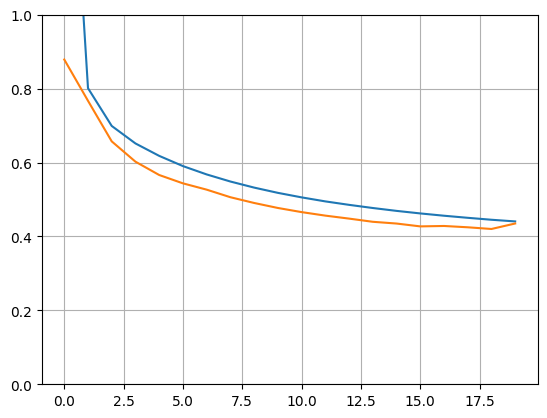

In [33]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 531us/step - loss: 0.4361


0.4360796809196472

In [35]:
X_new = X_test[:3]
y_pred = model.predict(X_new, verbose=0)
y_pred

array([[0.34033507],
       [1.5488467 ],
       [3.298955  ]], dtype=float32)

In [36]:
y_new = y_test[:3]
y_new

array([0.477  , 0.458  , 5.00001])

#### Building Complex Models Using the Functional API

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [39]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 30)                   930       ['dense_8[0][0]']             
                                                                                            

In [41]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.fit((X_train_A, X_train_B), y_train, epochs=20, 
          validation_data=((X_valid_A, X_valid_B), y_valid));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.4273 - val_loss: 1.4096
Epoch 2/20
363/363 [==============================] - 0s 874us/step - loss: 0.8138 - val_loss: 0.7548
Epoch 3/20
363/363 [==============================] - 0s 929us/step - loss: 0.6838 - val_loss: 0.6336
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6276 - val_loss: 0.5986
Epoch 5/20
363/363 [==============================] - 0s 913us/step - loss: 0.5946 - val_loss: 0.5699
Epoch 6/20
363/363 [==============================] - 0s 864us/step - loss: 0.5687 - val_loss: 0.5565
Epoch 7/20
363/363 [==============================] - 0s 908us/step - loss: 0.5486 - val_loss: 0.5651
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5314 - val_loss: 0.5073
Epoch 9/20
363/363 [==============================] - 0s 925us/step - loss: 0.5153 - val_loss: 0.4979
Epoch 10/20
363/363 [==============================] - 0s 921us/step - loss: 0.5016 - va

In [42]:
model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 539us/step - loss: 0.4284


0.42840149998664856

In [43]:
y_pred = model.predict((X_new_A, X_new_B), verbose=0)
y_pred

array([[0.53116035],
       [1.9133267 ],
       [3.1912177 ]], dtype=float32)

In [44]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
          validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.7858 - main_output_loss: 2.4042 - aux_output_loss: 6.2207 - val_loss: 2.3436 - val_main_output_loss: 1.8570 - val_aux_output_loss: 6.7226
Epoch 2/20
363/363 [==============================] - 0s 933us/step - loss: 1.1782 - main_output_loss: 0.8565 - aux_output_loss: 4.0741 - val_loss: 0.9566 - val_main_output_loss: 0.7086 - val_aux_output_loss: 3.1883
Epoch 3/20
363/363 [==============================] - 0s 892us/step - loss: 0.8873 - main_output_loss: 0.6820 - aux_output_loss: 2.7352 - val_loss: 0.7914 - val_main_output_loss: 0.6213 - val_aux_output_loss: 2.3220
Epoch 4/20
363/363 [==============================] - 0s 897us/step - loss: 0.7677 - main_output_loss: 0.6233 - aux_output_loss: 2.0664 - val_loss: 0.7415 - val_main_output_loss: 0.5766 - val_aux_output_loss: 2.2261
Epoch 5/20
363/363 [==============================] - 0s 915us/step - loss: 0.6999 - main_output_loss: 0.5857 - aux_output_loss: 1.7270 - 

In [45]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test]) # total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 704us/step - loss: 0.4791 - main_output_loss: 0.4263 - aux_output_loss: 0.9542


[0.47907957434654236, 0.4262908697128296, 0.9541770815849304]

In [46]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B), verbose=0)
y_pred_main, y_pred_aux

(array([[0.3823223],
        [1.9347081],
        [3.3305998]], dtype=float32),
 array([[1.4025521],
        [1.9426558],
        [2.4860034]], dtype=float32))

#### Using the Subclassing API to Build Dynamic Models